<a href="https://colab.research.google.com/github/aiswarya-sureshkumar/OIBSIP_taskno.2/blob/main/Car%20Price%20Prediction%20with%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Price Prediction with Machine Learning**

**Data Loading**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**Data** **Exploration**

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.0
mean,2013.920455,3.853030,6.209318,31969.803030,1.818182,0.352273,0.909091,0.0
std,2.436517,3.082793,5.018106,20889.231936,0.405629,0.478586,0.288026,0.0
min,2006.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.0
25%,2013.000000,0.875000,1.192500,15000.000000,2.000000,0.000000,1.000000,0.0
50%,2015.000000,3.500000,5.900000,30876.500000,2.000000,0.000000,1.000000,0.0
75%,2016.000000,5.812500,9.400000,45019.500000,2.000000,1.000000,1.000000,0.0
max,2018.000000,12.900000,22.830000,92233.000000,2.000000,1.000000,1.000000,0.0


In [ ]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]),
 [Text(0, 0, 'ritz'),
  Text(1, 0, 'sx4'),
  Text(2, 0, 'ciaz'),
  Text(3, 0, 'wagon r'),
  Text(4, 0, 'swift'),
  Text(5, 0, 'vitara brezza'),
  Text(6, 0, 's cross'),
  Text(7, 0, 'alto 800'),
  Text(8, 0, 'ertiga'),
  Text(9, 0, 'dzire'),
  Text(10, 0, 'alto k10'),
  Text(11, 0, 'ignis'),
  Text(12, 0, '800'),
  Text(13, 0, 'baleno'),
  Text(14, 0, 'omni'),
  Text(15, 0, 'fortuner'),
  Text(16, 0, 'innova'),
  Text(17, 0, 'corolla altis'),
  Text(18, 0, 'etios cross'),
  Text(19, 0, 'etios g'),
  Text(20, 0, 'etios liva'),
  Text(21, 0, 'corolla'),


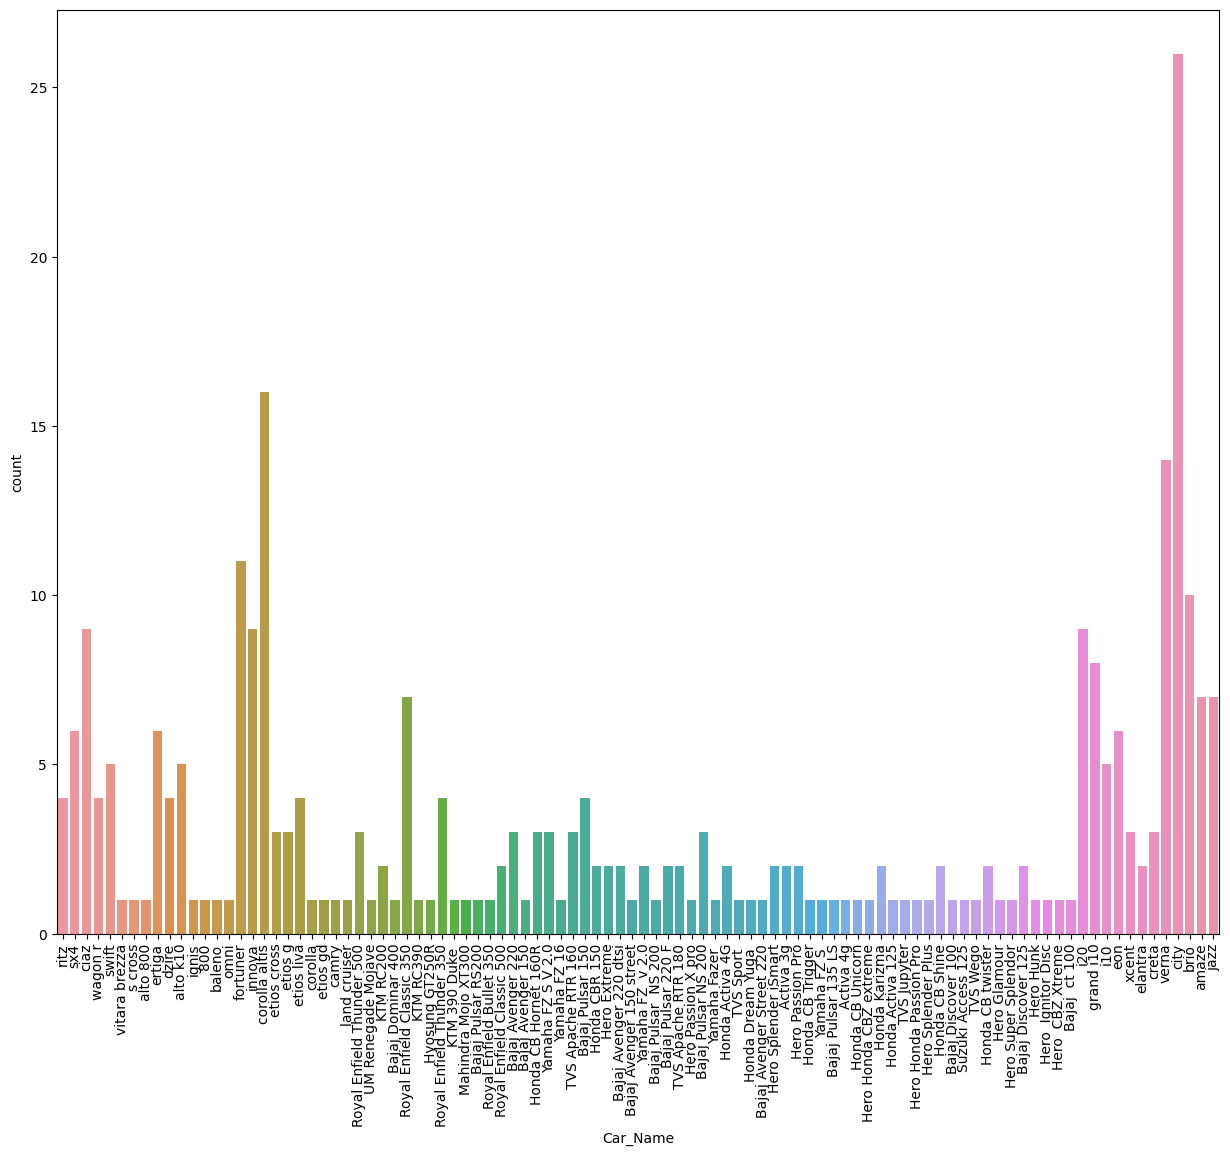

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(x=df['Car_Name'])
plt.xticks(rotation=90)

In [ ]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

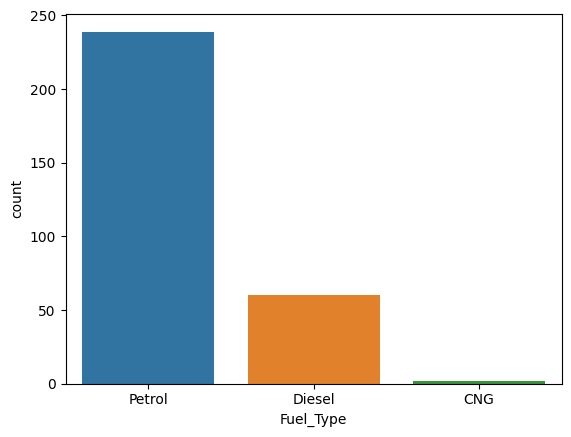

In [ ]:
sns.countplot(x=df['Fuel_Type'])

In [ ]:
df['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

<Axes: xlabel='Selling_type', ylabel='count'>

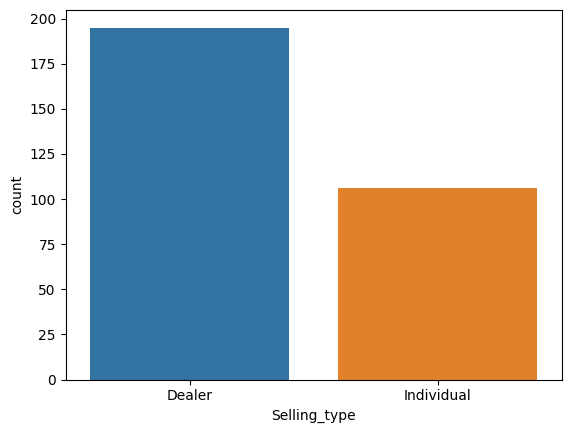

In [ ]:
sns.countplot(x=df['Selling_type'])

In [ ]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

<Axes: xlabel='Transmission', ylabel='count'>

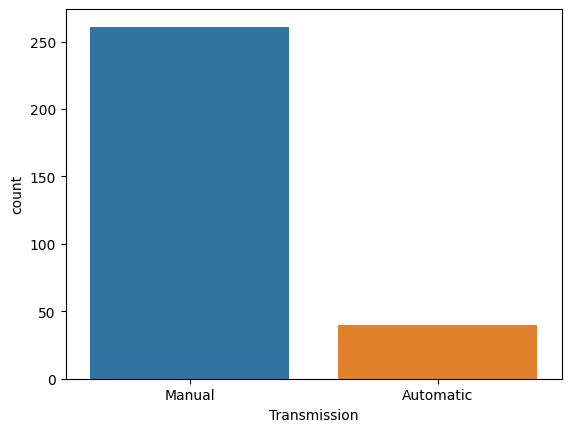

In [ ]:
sns.countplot(x=df['Transmission'])

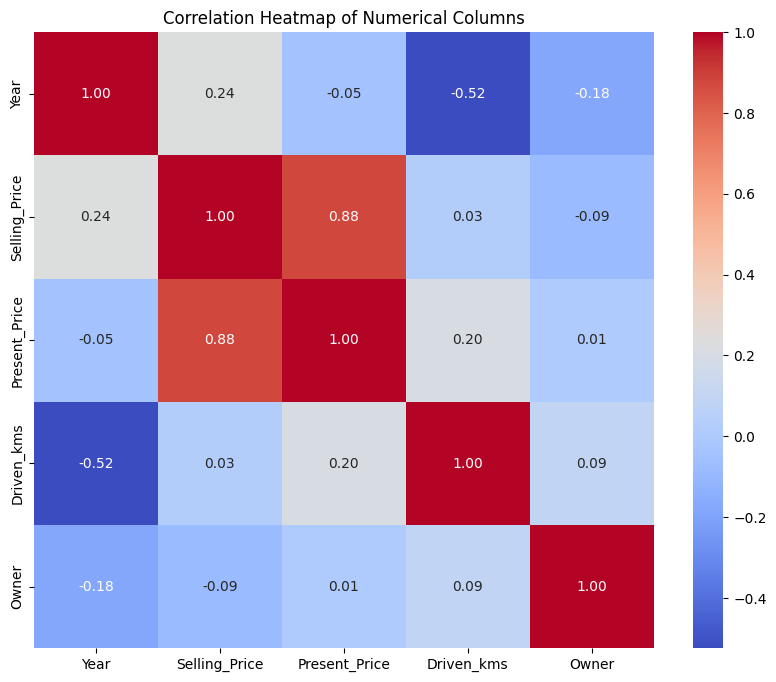

In [ ]:
# To create heatmap - to get correlation between numerical columns
numerical_columns=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
numerical_df=df[numerical_columns]
correlation_matrix=numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

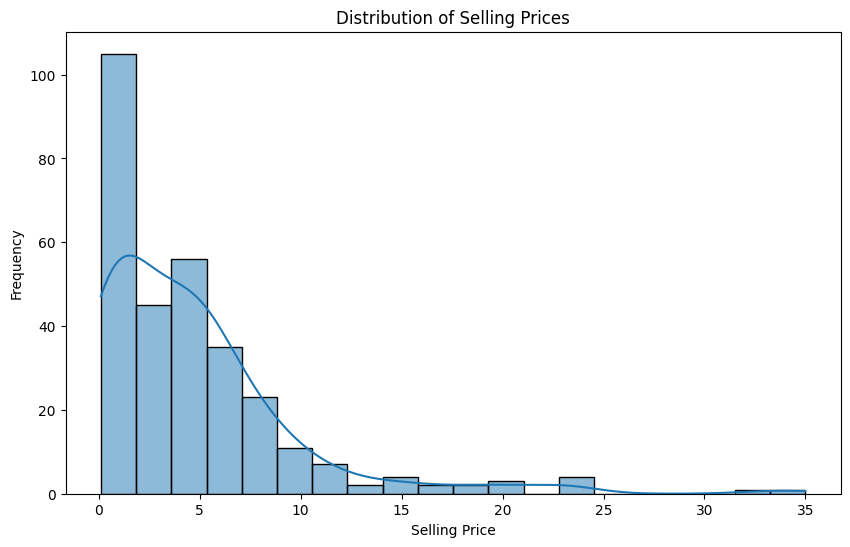

In [ ]:
# To plot distribution of Selling price
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

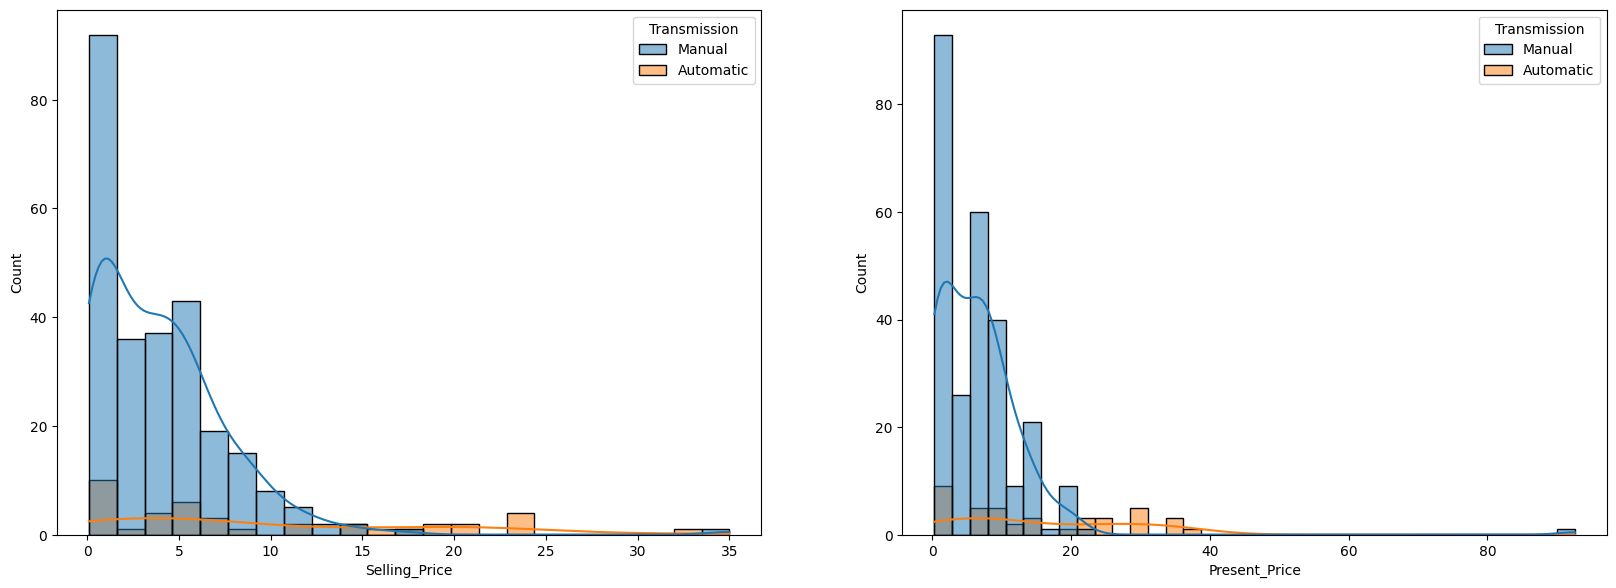

In [ ]:
# The distribution of selling price and present price based on transmission
plt.figure(figsize = (20,15))
for i,j in enumerate(['Selling_Price', 'Present_Price']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df,x=j,kde=True,hue='Transmission')
plt.show()

**Data Preprocessing**

In [ ]:
df.drop('Car_Name',axis=1,inplace=True)
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


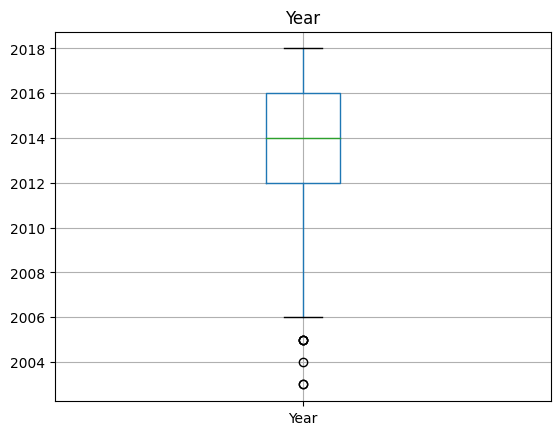

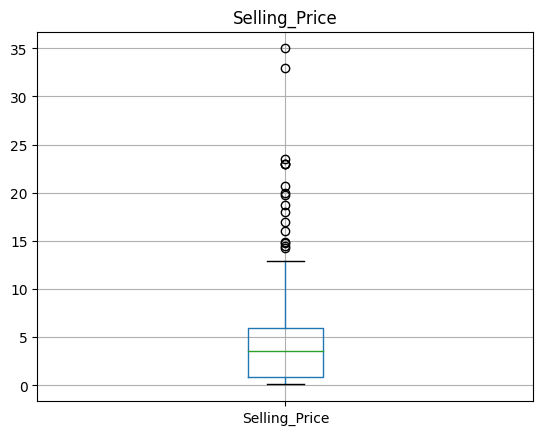

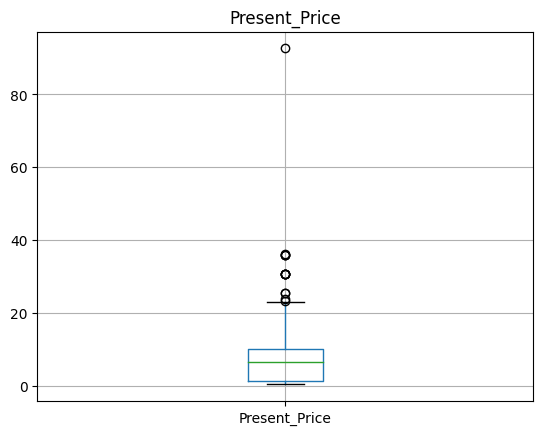

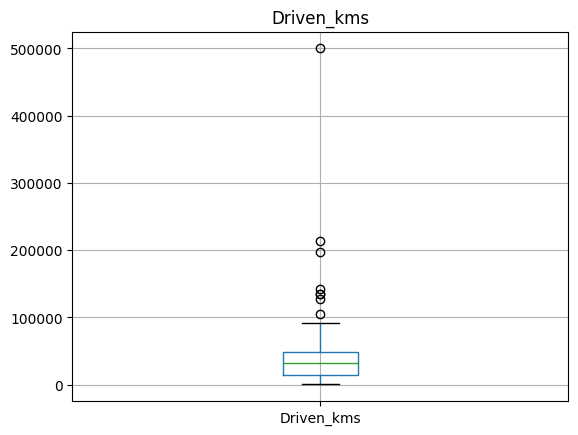

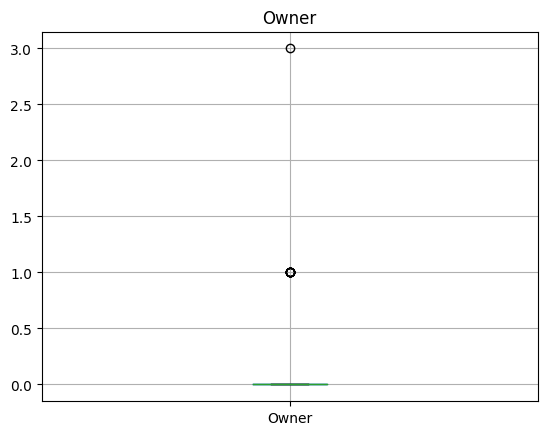

In [ ]:
# Identification of outliers by plotting boxplot for numerical columns
num_columns=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
for i in df:
  if i in num_columns:
     plt.figure()
     plt.gca().set_title(i)
     df.boxplot([i])

In [ ]:
# Removing the outilers using IQR method
def remove_outliers(df):
  outlier_indices=[]
  columns=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
  for i in columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    outliers=df.index[(df[i]<lower_limit)|(df[i]>upper_limit)]
    outlier_indices.extend(outliers)
  df_cleaned=df.drop(outlier_indices)
  return df_cleaned

In [ ]:
df=remove_outliers(df)
df.shape

(264, 8)

In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Fuel_Type']=lb.fit_transform(df['Fuel_Type'])
df['Selling_type']=lb.fit_transform(df['Selling_type'])
df['Transmission']=lb.fit_transform(df['Transmission'])

In [ ]:
df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type       int64
Transmission       int64
Owner              int64
dtype: object

In [ ]:
x=df.drop(['Selling_Price'],axis=1)
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [ ]:
y=df['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 264, dtype: float64

**Splitting into Training and Testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

**Model creation and Performance evaluation**

In [ ]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_absolute_percentage_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.5592168370363255
0.8335669874931395


In [ ]:
# Desicion Tree model
from sklearn.tree import DecisionTreeRegressor
t_model=DecisionTreeRegressor()
t_model.fit(x_train,y_train)
t_y_pred=t_model.predict(x_test)
print(mean_absolute_percentage_error(y_test,t_y_pred))
print(r2_score(y_test,t_y_pred))

0.23257576689556006
0.8559398635302574


In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train,y_train)
rf_y_pred=rf_model.predict(x_test)
print(mean_absolute_percentage_error(y_test,rf_y_pred))
print(r2_score(y_test,rf_y_pred))

0.20061964203647906
0.8847768671073933
